In [51]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [52]:
PATH = Path("/Users/c24102394/Desktop/PA-symptomology")

In [53]:
df = pd.read_csv(PATH / "Experiments/Per-day-prediction /Data/Symptomtrackingdata_csv-cleaned_with_vars_ml_ready.csv")

In [54]:
df.columns

Index(['id', 'day', 'W_t', 'S_t', 'U_t', 'w_t', 'q_t', 'wq', 'w_t2', 'q_t2',
       'total_symptom_score', 'symptom_count', 'max_symptom_score',
       'symptom_variability', 'cognitive_mean', 'neuro_mean',
       'painfatigue_mean', 'is_treated', 'treatment_type', 'day.1',
       'days_since_start', 'days_since_treatment_start', 'treated_today',
       'treated_yday', 'treated_last3_any', 'days_since_last_treat', 'dow',
       'dow_sin', 'dow_cos', 'W_t_lag1', 'S_t_lag1', 'U_t_lag1', 'W_t_lag2',
       'S_t_lag2', 'U_t_lag2', 'W_t_lag7', 'S_t_lag7', 'U_t_lag7', 'dW_t',
       'dS_t', 'dU_t', 'W_t_roll3_mean', 'S_t_roll3_mean', 'U_t_roll3_mean',
       'W_t_roll7_mean', 'S_t_roll7_mean', 'U_t_roll7_mean', 'W_t_roll7_std',
       'S_t_roll7_std', 'U_t_roll7_std', 'W_t_roll14_mean', 'S_t_roll14_mean',
       'U_t_roll14_mean', 'W_t_roll14_std', 'S_t_roll14_std', 'U_t_roll14_std',
       'W_t_ewm_a03', 'S_t_ewm_a03', 'U_t_ewm_a03', 'W_t_ewm_a10',
       'S_t_ewm_a10', 'U_t_ewm_a10', 'U_ru

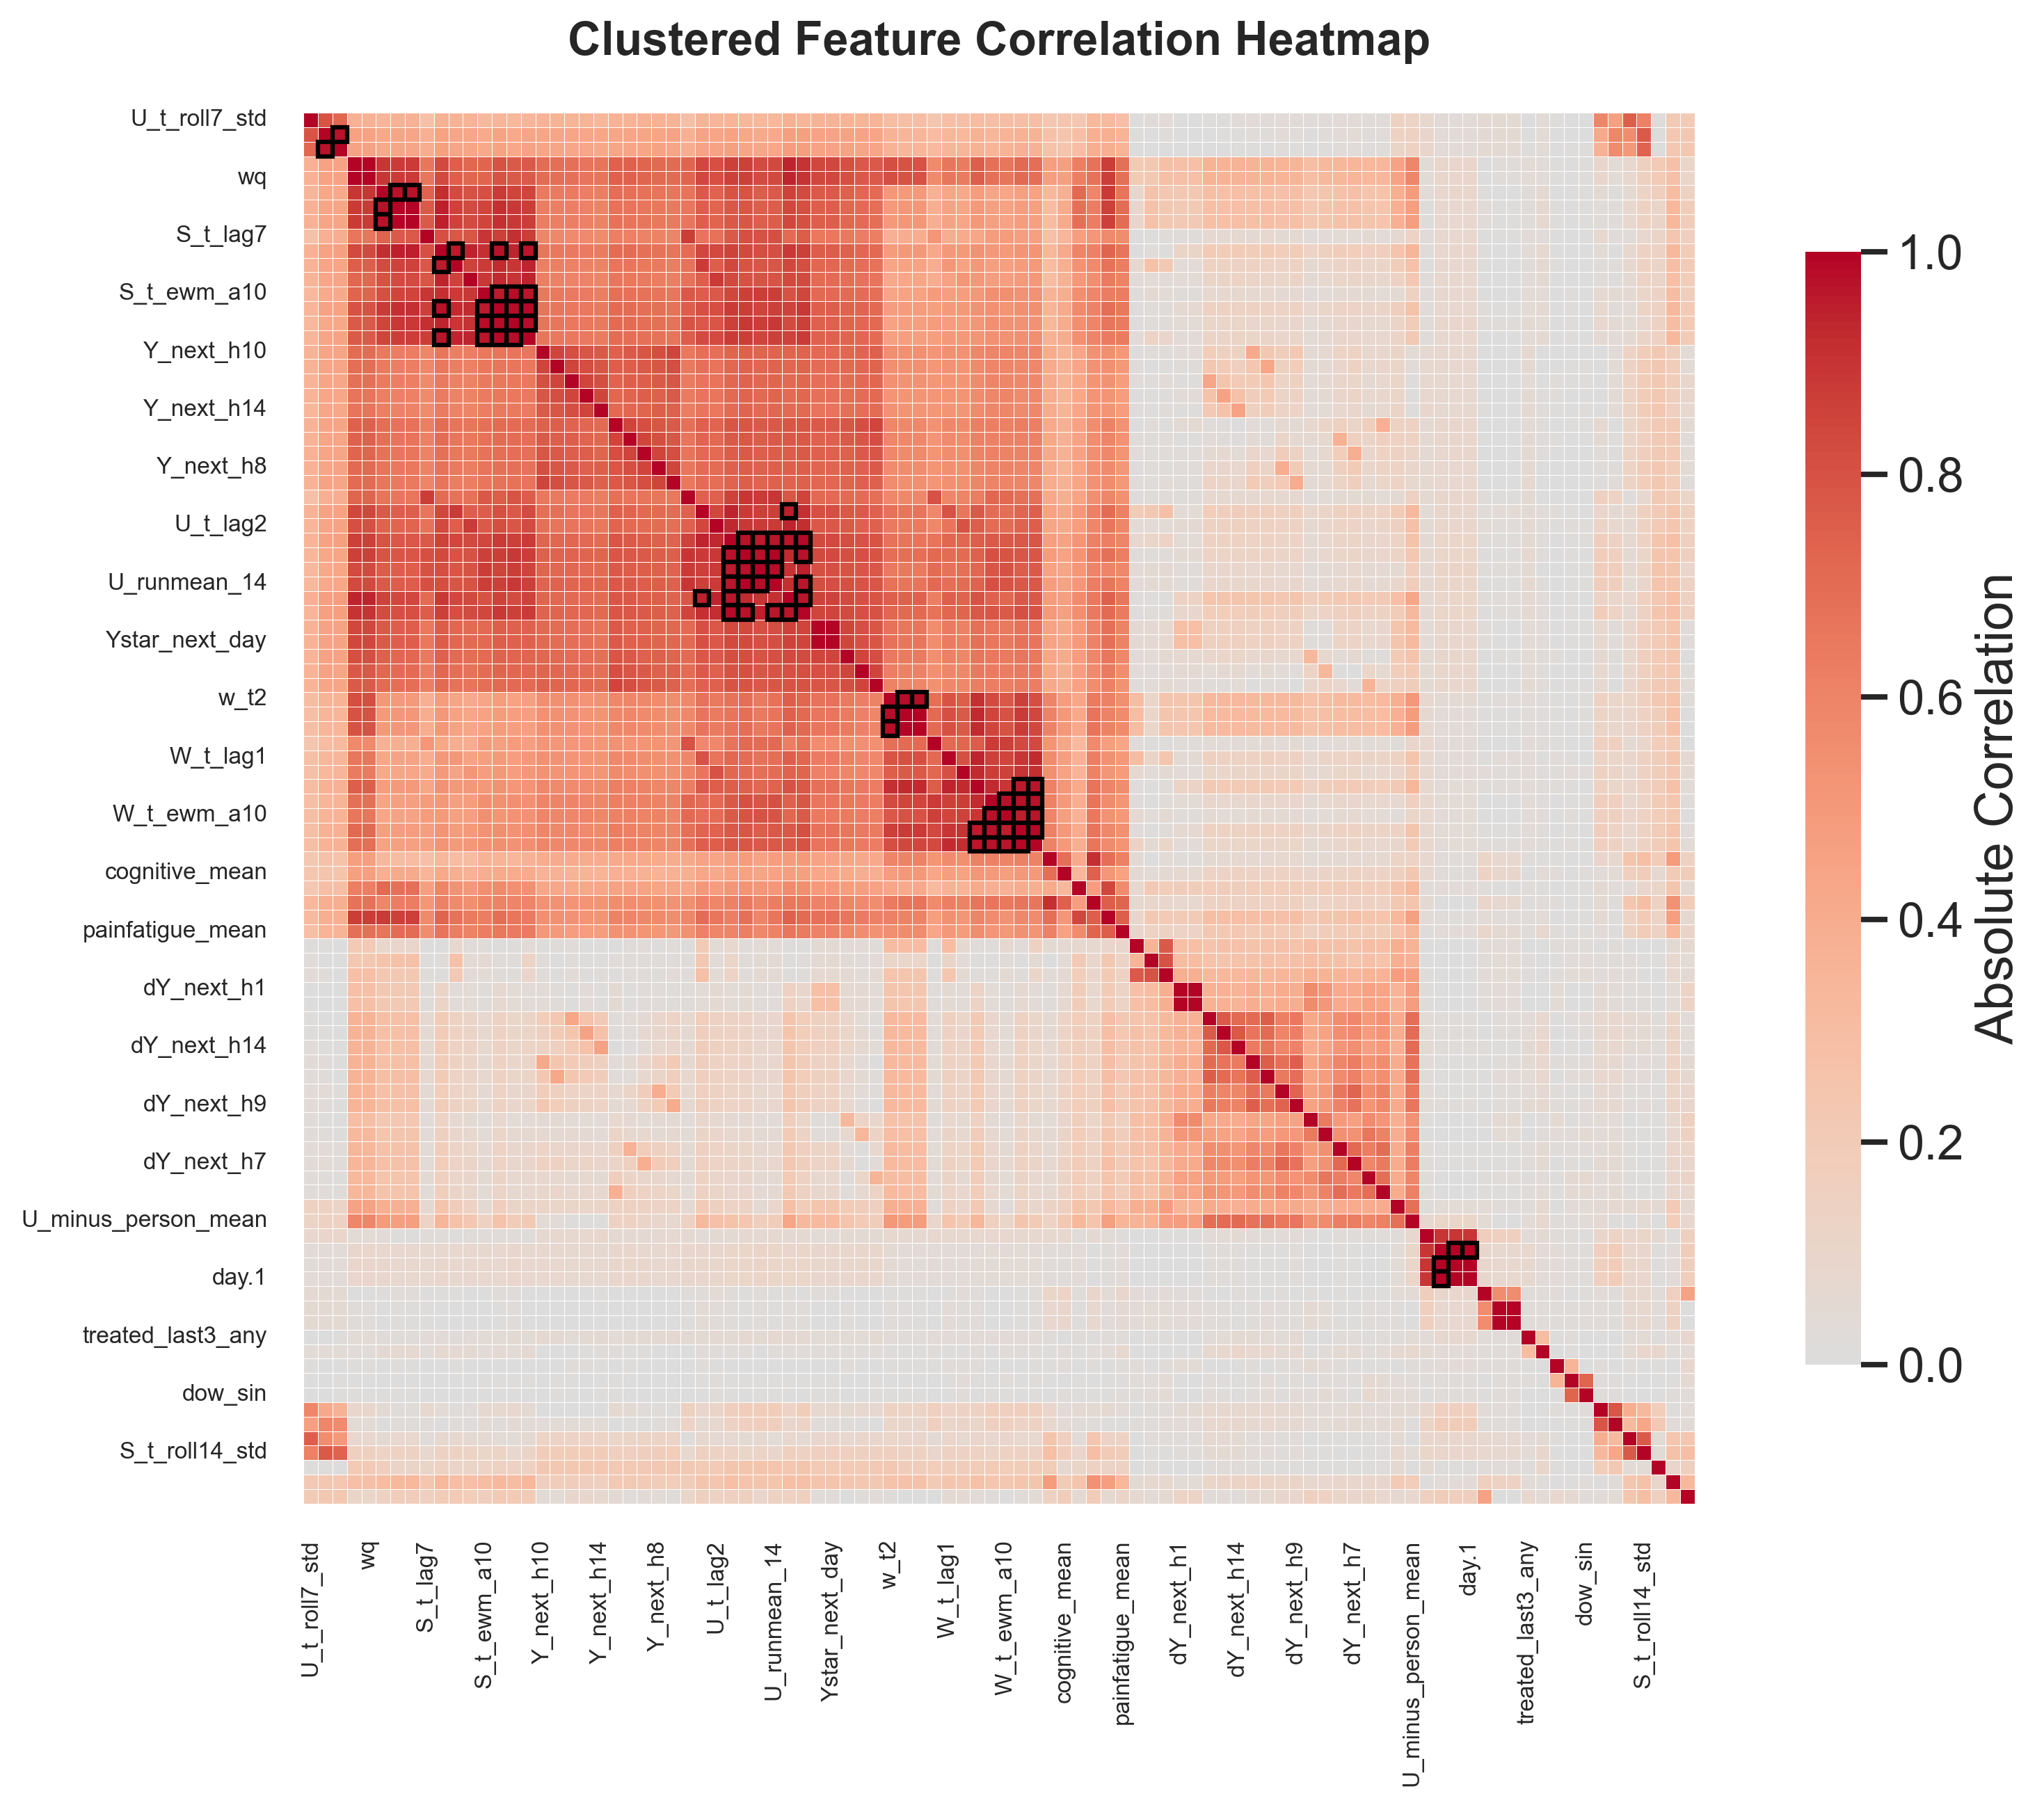

In [55]:
corr = df.corr(numeric_only=True).abs().replace([np.inf, -np.inf], np.nan).dropna(how="all").fillna(0)
g = sns.clustermap(corr, cmap="coolwarm", center=0, vmin=0, vmax=1, figsize=(12, 9))
plt.close(g.fig)
corr_clustered = corr.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]

plt.figure(figsize=(12, 9), dpi=300)
ax = sns.heatmap(
    corr_clustered, cmap="coolwarm", center=0, vmin=0, vmax=1,
    square=True, cbar_kws={"shrink": 0.8, "label": "Absolute Correlation"},
    linewidths=0.2, linecolor="white"
)

r95 = np.where((corr_clustered > 0.95) & (corr_clustered < 1))
for i, j in zip(*r95):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor="black", lw=1.5))

plt.title("Clustered Feature Correlation Heatmap", fontsize=16, weight="bold", pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [68]:
sns.set_theme(style="whitegrid", context="talk")

In [69]:
for c in ["U_t","W_t","S_t","dU_t","symptom_count","symptom_variability"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

/Users/c24102394/PyCharmMiscProject/.venv/lib/python3.9/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/c24102394/PyCharmMiscProject/.venv/lib/python3.9/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/c24102394/PyCharmMiscProject/.venv/lib/python3.9/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


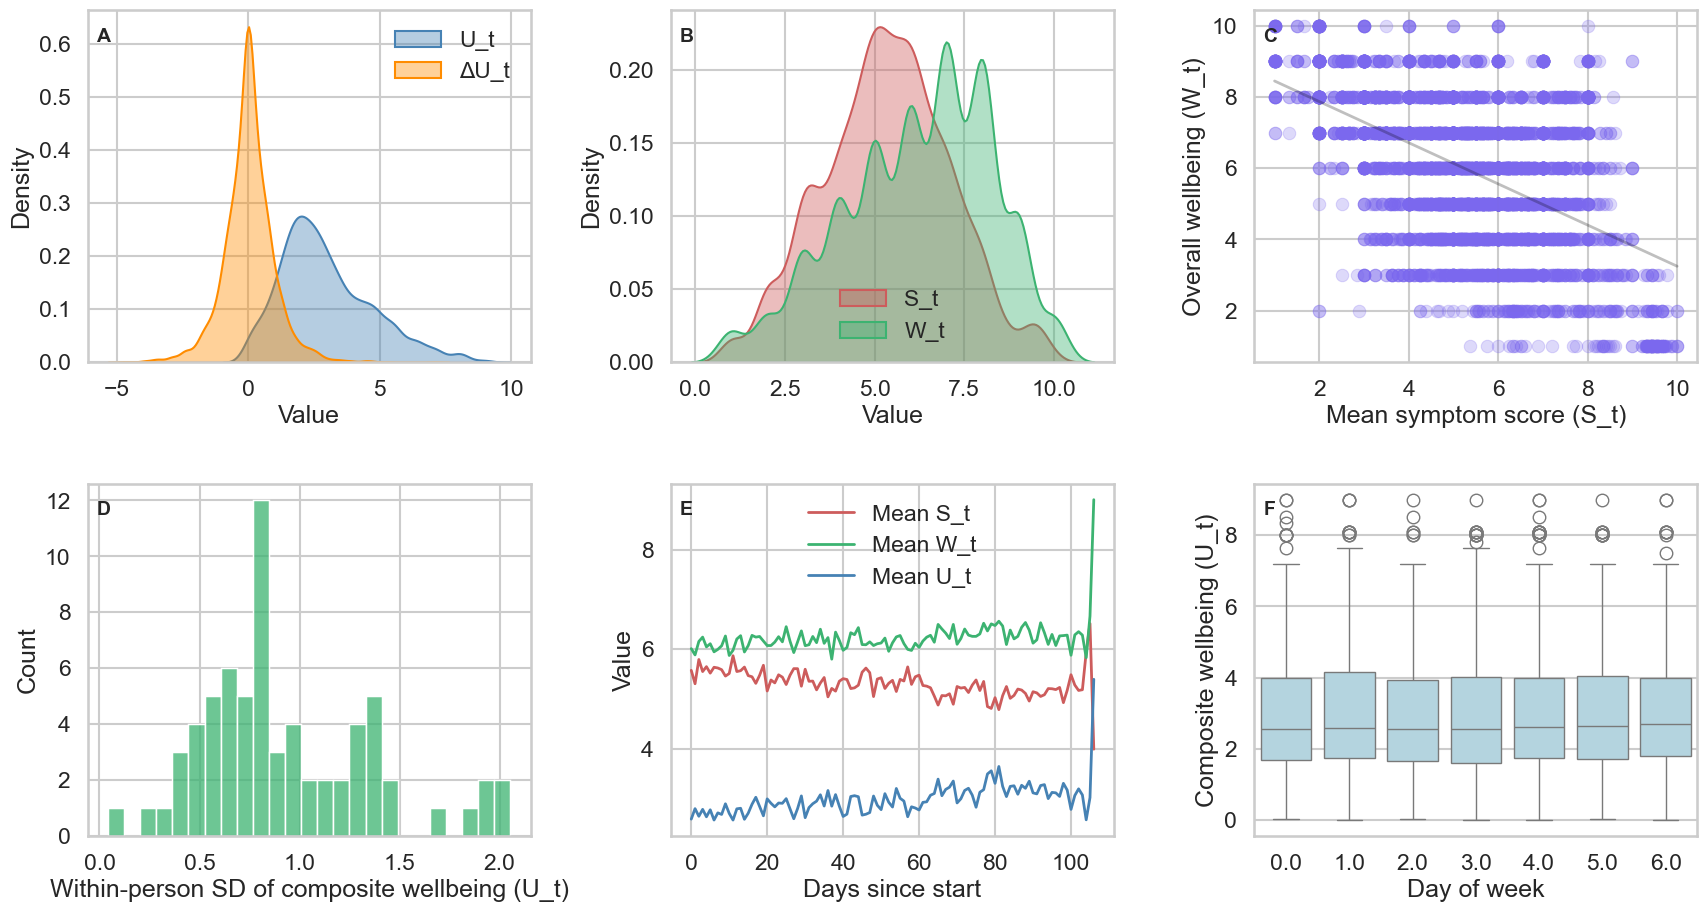

In [74]:
dfp = df.replace([np.inf, -np.inf], np.nan)
id_col = "id" if "id" in dfp.columns else ("ID" if "ID" in dfp.columns else None)

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()
idx = 0

def add_label(ax, label):
    ax.text(0.02, 0.95, label, transform=ax.transAxes, fontsize=14, fontweight="bold", va="top", ha="left")

if {"U_t", "dU_t"}.issubset(dfp.columns):
    ax = axes[idx]
    sns.kdeplot(dfp["U_t"].dropna(), fill=True, alpha=0.4, color="steelblue", label="U_t", ax=ax)
    sns.kdeplot(dfp["dU_t"].dropna(), fill=True, alpha=0.4, color="darkorange", label="ΔU_t", ax=ax)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend(frameon=False)
    add_label(ax, "A")
    idx += 1

if {"S_t","W_t"}.issubset(dfp.columns):
    ax = axes[idx]
    sns.kdeplot(dfp["S_t"].dropna(), fill=True, alpha=0.4, color="indianred", label="S_t", ax=ax)
    sns.kdeplot(dfp["W_t"].dropna(), fill=True, alpha=0.4, color="mediumseagreen", label="W_t", ax=ax)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend(frameon=False)
    add_label(ax, "B")
    idx += 1

if {"S_t", "W_t"}.issubset(dfp.columns):
    ax = axes[idx]
    data = dfp[["S_t", "W_t"]].dropna()
    sns.scatterplot(
        x="S_t", y="W_t", data=data,
        alpha=0.25, color="mediumslateblue", edgecolor=None, ax=ax
    )
    sns.regplot(
        x="S_t", y="W_t", data=data,
        scatter=False, ci=None, color="black",
        line_kws={"linewidth": 2, "alpha": 0.25}, ax=ax
    )
    ax.set_xlabel("Mean symptom score (S_t)")
    ax.set_ylabel("Overall wellbeing (W_t)")
    add_label(ax, "C")
    idx += 1

if id_col is not None and "U_t" in dfp.columns:
    sd = dfp.groupby(id_col)["U_t"].std().dropna()
    ax = axes[idx]
    sns.histplot(sd, bins=25, color="mediumseagreen", ax=ax)
    ax.set_xlabel("Within-person SD of composite wellbeing (U_t)")
    ax.set_ylabel("Count")
    add_label(ax, "D")
    idx += 1

if {"days_since_start", "S_t", "W_t", "U_t"}.issubset(dfp.columns) and id_col is not None:
    g = dfp.groupby(["days_since_start", id_col])[["S_t", "W_t", "U_t"]].mean().reset_index()
    summary = g.groupby("days_since_start")[["S_t", "W_t", "U_t"]].mean().reset_index()
    x = summary["days_since_start"].to_numpy(dtype=float)
    ax = axes[idx]
    ax.plot(x, summary["S_t"].to_numpy(dtype=float), color="indianred", linewidth=2, label="Mean S_t")
    ax.plot(x, summary["W_t"].to_numpy(dtype=float), color="mediumseagreen", linewidth=2, label="Mean W_t")
    ax.plot(x, summary["U_t"].to_numpy(dtype=float), color="steelblue", linewidth=2, label="Mean U_t")
    ax.set_xlabel("Days since start")
    ax.set_ylabel("Value")
    ax.legend(frameon=False)
    add_label(ax, "E")
    idx += 1

if "dow" in dfp.columns and "U_t" in dfp.columns:
    ax = axes[idx]
    sns.boxplot(x="dow", y="U_t", data=dfp, color="lightblue", ax=ax)
    ax.set_xlabel("Day of week")
    ax.set_ylabel("Composite wellbeing (U_t)")
    add_label(ax, "F")
    idx += 1

for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()